# Design of Digital Filters

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Design of Recursive Filters by the Bilinear Transform

The design of analog systems with certain desired properties is a topic with a long lasting history. It is often oft interest to realize these designs by digital systems which (approximately) preserve these properties. Consequently, various techniques have been developed to derive digital realizations of analog systems. For instance the [impulse invariance](https://en.wikipedia.org/wiki/Impulse_invariance) method, the [matched Z-transform](https://en.wikipedia.org/wiki/Matched_Z-transform_method) and the [bilinear transform](https://en.wikipedia.org/wiki/Bilinear_transform). The following section introduces the bilinear transform and its application to the digital realization of analog systems and recursive filter design.

### The Bilinear Transform

The basic idea of the bilinear transform is to map a given transfer function $H(s) = \mathcal{L}\{ h(t) \}$ of a continuous system to the transfer function $H(z) = \mathcal{Z}\{ h[k] \}$ of its discrete counterpart. The transform is designed such to preserve certain properties of the continuous in the digital domain. In particular

* a [rational function](https://en.wikipedia.org/wiki/Rational_function) $H(s)$ in $s$ should be mapped into a rational function $H(z)$ in $z^{-1}$ of the same order, and
* poles and zeros should be mapped from the left $s$-half plane into the unit circle in the $z$-plane.

The first condition ensures that the digital representation can be realized by a difference equation, the second that important system properties (e.g. causality and stability) are preserved. Introducing ideal sampling into the definition of the Laplace transform and comparing the result to the definition of the $z$-transform reveals the link between the complex frequencies $s$ and $z$ of the Laplace and $z$-transformation, respectively. It is given as

\begin{equation}
z = \mathrm{e}^{\,s T}
\end{equation}

where $T$ denotes the sampling interval.

For sampled signals the resulting mapping from the $s$-plane into the $z$-plane is shown in the following illustration:

![Mapping of s-plane onto z-plane for sampled signals](sz_mapping.png)

The shading indicates how the different areas are mapped. The imaginary axis $s = \mathrm{j}\,\omega$ is mapped onto the unit circle $z = \mathrm{e}^{\,\mathrm{j}\,\Omega}$, representing the frequency response of the continuous and discrete system. The left half-plane of the $s$-plane is mapped into the unit circle of the $z$-plane.

For the desired mapping of $H(s)$ to $H(z)$ we need the inverse of above equation. It is given as

\begin{equation}
s = \frac{1}{T} \cdot \ln (z)
\end{equation}

However, when introduced into a rational transfer function $H(s)$ this non-linear mapping would not result in the desired rational transfer function $H(z)$. In order to achieve the desired mapping, $\ln(z)$ is expanded into the power series

\begin{equation}
\ln(z) = 2 \left( \frac{z-1}{z+1} + \frac{(z-1)^3}{3(z+1)^3} + \frac{(z-1)^5}{5(z+1)^5} + \dots \right)
\end{equation}

Using only the linear term as approximation of $\ln(z)$ yields the bilinear transform

\begin{equation}
s = \frac{2}{T} \cdot \frac{z - 1}{z + 1}
\end{equation}

and its inverse

\begin{equation}
z = \frac{2 + s T}{2 - s T}
\end{equation}

It worthwhile noting that this mapping rule is a special case of a [conformal map](https://en.wikipedia.org/wiki/Conformal_map).

Let's consider the mapping of the frequency response $H(\mathrm{j}\,\omega) = H(s) \big\vert_{s = \mathrm{j}\,\omega}$ of a continuous system to the frequency response $H_d(\mathrm{e}^{\,\mathrm{j}\,\omega T}) = H_d(z)\big\vert_{z = \mathrm{e}^{\,\mathrm{j}\,\Omega}}$ of a discrete system. Introducing the bilinear transform into the continuous system to yield its discrete counterpart results in

\begin{equation}
H_d(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = H \left( \frac{2}{T} \cdot \frac{z - 1}{z + 1} \right) \Bigg\vert_{z = \mathrm{e}^{\,\mathrm{j}\,\Omega}} = H \Big( \mathrm{j} \; \underbrace{\frac{2}{T} \cdot \tan(\frac{\Omega}{2})}_{\omega} \Big)
\end{equation}

The imaginary axis $s=\mathrm{j}\,\omega$ of the $s$-plane is mapped onto the unit circle $\mathrm{e}^{\,\mathrm{j}\,\Omega}$ of the $z$-plane. Note, that for sampled signals the mapping between the continuous frequency axis $\omega$ and the frequency axis $\Omega$ of the discrete system is $\Omega = \omega T$. However, for the bilinear transform the mapping is non-linear

\begin{align}
\omega &= \frac{2}{T} \cdot \tan(\frac{\Omega}{2}) \\
\Omega &= 2 \arctan(\frac{\omega T}{2})
\end{align}

In the following, this is illustrated for $T=1$

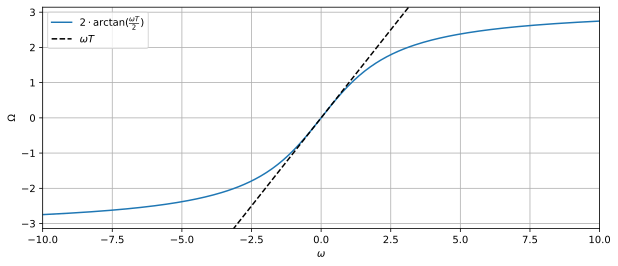

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

om = np.linspace(-10, 10, 200)
Om = 2*np.arctan(om*1/2)

plt.figure(figsize=(10, 4))
plt.plot(om, Om, label=r'$2 \cdot \arctan(\frac{\omega T}{2})$')
plt.plot(om, om, 'k--', label=r'$\omega T$')
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\Omega$')
plt.axis([-10, 10, -np.pi, np.pi])
plt.legend(loc=2)
plt.grid()

It is evident that the frequency axis deviates from the linear mapping $\Omega = \omega T$, especially for high frequencies. The frequency response of the digital filter $H_d(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ therefore deviates from the desired continuous frequency response $H(\mathrm{j}\,\omega)$. This is due to the first-order approximation of the mapping from the $s$-plane to the $z$-plane. The effect is known as *frequency warping*. It can be considered explicitly in the filter design stage, as shown in the examples.

Besides this drawback, the bilinear transform has a number of benefits: 

* Stability and minimum-phase of the continuous filter is preserved. This is due to mapping of the left half-space of the $s$-plane into the unit-circle of the $z$-plane.
* The order of the continuous filter is preserved. This is due to the linear mapping rule.
* No aliasing distortion as for instance observed for the [impulse invariance method](https://en.wikipedia.org/wiki/Impulse_invariance).

The application of the bilinear transform to the design of digital filters is discussed in the following.

### Design of Digital Filter

We aim at designing a digital filter $H_d(z)$ that approximates a given continuous prototype $H(s)$ using the bilinear transform. For instance, the transfer function $H(s)$ may result from the analysis of an analog circuit or filter design technique. The transfer function $H_d(z)$ of the digital filter is then given by

\begin{equation}
H_d(z) = H(s) \Big\vert_{s = \frac{2}{T} \cdot \frac{z - 1}{z + 1}}
\end{equation}

The coefficients of the digital filter are derived by representing the numerator and denominator of $H_d(z)$ as polynomials with respect to $z^{-1}$. For instance, for a continuous system of second order (second order section) 

\begin{equation}
H(s) = \frac{\beta_0 + \beta_1 s + \beta_2 s^2}{\alpha_0 + \alpha_1 s + \alpha_2 s^2}
\end{equation}

the bilinear transform results in

\begin{equation}
H_d(z) = \frac{(\beta_2 K^2 - \beta_1 K + \beta_0) \, z^{-2} + (2 \beta_0 - 2 \beta_2 K^2) \,  z^{-1} + (\beta_2 K^2 + \beta_1 K + \beta_0)}
{(\alpha_2 K^2 - \alpha_1 K + \alpha_0) \, z^{-2} + (2 \alpha_0 - 2 \alpha_2 K^2) \,  z^{-1} + (\alpha_2 K^2 + \alpha_1 K + \alpha_0)}
\end{equation}
where $K = \frac{2}{T}$.

As outlined in the previous section, the frequency response of the digital filter $H_d(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ will differ for high frequencies from the desired analog frequency response $H(\mathrm{j}\,\omega)$. For the design of a digital filter from an analog prototype, this can be coped for by replacing corner frequencies with

\begin{equation}
\omega_\text{cw} = \frac{2}{T} \cdot \tan \left(\frac{\omega_\text{c} T}{2} \right)
\end{equation}

where $\omega_\text{cw}$ denotes a *warped* corner frequency $\omega_\text{c}$. This techniques is known as *pre-warping*.

### Examples

The following two examples illustrate the digital realization of an analog system and the design of a recursive filter, respectively.

#### Digital realization of an analog system

A second-order lowpass filter can be realized by the following passive circuit

![Analog second-order lowpass](RLC_lowpass.png)

where $x(t)$ denotes the input and $y(t)$ the output signal (voltage). Analysis of the circuit reveals its transfer function as

\begin{equation}
H(s) = \frac{Y(s)}{X(s)} = \frac{1}{LC \, s^2 + RC \, s + 1}
\end{equation}

Introducing this into the bilinear transform of a second order section (SOS) given in the previous section yields

\begin{equation}
H_d(z) = \frac{T^2 \, z^{-2} + 2 T^2 \, z^{-1} + T^2}{(4 LC - 2 TRC + T^2) \, z^{-2} + (-8 LC + 2 T^2) \, z^{-1} + (4 LC - 2 TRC + T^2)}
\end{equation}

In the following, the frequency response of the analog filter and its digital realization is compared numerically.

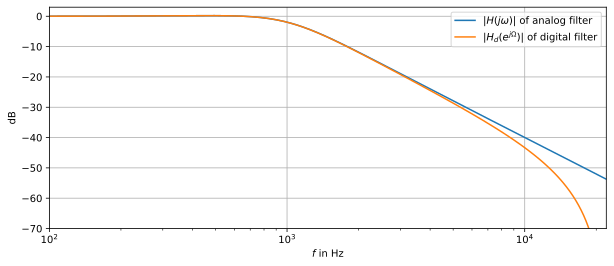

In [2]:
import scipy.signal as sig


fs = 44100  # sampling frequency
fc = 1000  # corner frequency of the lowpass

# coefficients of analog lowpass filter
Qinf = 0.8
sinf = 2*np.pi*fc
C = 1e-6
L = 1/(sinf**2*C)
R = sinf*L/Qinf

B = [0, 0, 1]
A = [L*C, R*C, 1]

# cofficients of digital filter
T = 1/fs
b = [T**2, 2*T**2, T**2]
a = [(4*L*C+2*T*R*C+T**2), (-8*L*C+2*T**2), (4*L*C-2*T*R*C+T**2)]

# compute frequency responses
Om, Hd = sig.freqz(b, a, worN=1024)
tmp, H = sig.freqs(B, A, worN=fs*Om)

# plot results
f = Om*fs/(2*np.pi)
plt.figure(figsize=(10, 4))
plt.semilogx(f, 20*np.log10(np.abs(H)),
             label=r'$|H(j \omega)|$ of analog filter')
plt.semilogx(f, 20*np.log10(np.abs(Hd)),
             label=r'$|H_d(e^{j \Omega})|$ of digital filter')
plt.xlabel(r'$f$ in Hz')
plt.ylabel(r'dB')
plt.axis([100, fs/2, -70, 3])
plt.legend()
plt.grid()

**Exercise**

* Increase the corner frequency `fc` of the analog filter. What effect does this have on the deviations between the analog filter and its digital representation?

Solution: Increasing the corner frequency leads to larger deviations for the higher frequencies as the width of the stop-band of the filter decreases. These deviations may even lead to a different corner/[cut-off frequency](https://en.wikipedia.org/wiki/Cutoff_frequency) as the attenuation in the transition region between the pass- and the stop-band changes.

#### Design of digital filters from analog prototypes

The design of analog filters is a topic with a long lasting history. Consequently, many analog filter designs are known. For instance

* [Butterworth filters](https://en.wikipedia.org/wiki/Butterworth_filter)
* [Chebyshev_filters](https://en.wikipedia.org/wiki/Chebyshev_filter)
* [Cauer filters](https://en.wikipedia.org/wiki/Elliptic_filter)
* [Bessel filters](https://en.wikipedia.org/wiki/Bessel_filter)

The properties of these designs are well documented and therefore digital realizations are of interest. These can be achieved by the bilinear transform. In Python, the [`scipy.signal`](http://docs.scipy.org/doc/scipy/reference/signal.html) package provides implementations of various analog filter design techniques, as well as an implementation of the bilinear transform. 

The design of a Butterworth bandpass using pre-warping is illustrated in the following.

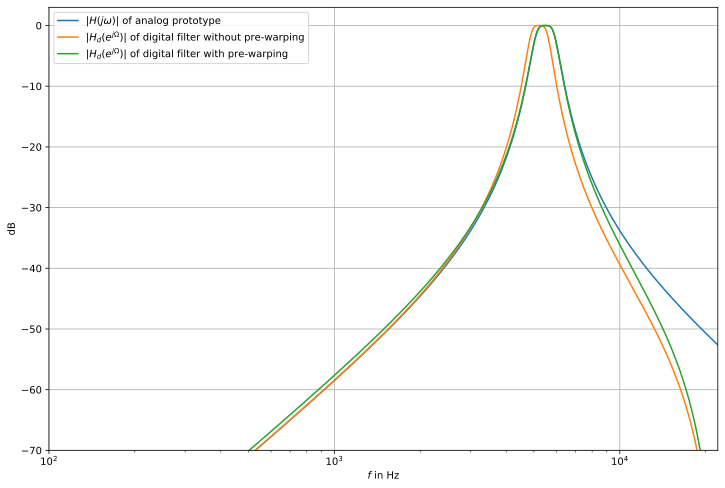

In [3]:
omc = 2*np.pi*np.array([5000, 6000])  # corner frequencies of bandpass
N = 2  # order of filter

# pre-warping of corner frequencies
omcp = 2*fs*np.tan(omc/(2*fs))

# design of analog filters with and without pre-warping
B, A = sig.butter(N, omc, btype='bandpass', analog=True)
Bp, Ap = sig.butter(N, omcp, btype='bandpass', analog=True)

# bilinear transform of analog prototypes
b, a = sig.bilinear(B, A, fs)
bp, ap = sig.bilinear(Bp, Ap, fs)

# compute frequency responses
Om, Hdp = sig.freqz(bp, ap, worN=1024)
Om, Hd = sig.freqz(b, a, worN=1024)
tmp, H = sig.freqs(B, A, worN=fs*Om)

# plot results
np.seterr(divide='ignore')
f = Om*fs/(2*np.pi)
plt.figure(figsize=(12, 8))
plt.semilogx(f, 20*np.log10(np.abs(H)),
             label=r'$|H(j \omega)|$ of analog prototype')
plt.semilogx(f, 20*np.log10(np.abs(Hd)),
             label=r'$|H_d(e^{j \Omega})|$ of digital filter without pre-warping')
plt.semilogx(f, 20*np.log10(np.abs(Hdp)),
             label=r'$|H_d(e^{j \Omega})|$ of digital filter with pre-warping')
plt.xlabel(r'$f$ in Hz')
plt.ylabel(r'dB')
plt.axis([100, fs/2, -70, 3])
plt.legend()
plt.grid()

**Exercise**

* What is improved by pre-warping?
* Change the corner frequencies `omc` of the analog prototype and examine the deviations from the analog prototype. When is pre-warping beneficial and when not?

Solution: The location and width of the pass-band of the digital filter is closer to the desired pass-band when pre-warping is used in the design process. Pre-warping is especially beneficial if the desired pass-band is located at higher frequencies, as the deviations caused by the bilinear transformation are less prominent for lower frequencies.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.